In [1]:
import numpy as np, matplotlib.pyplot as plt, cv2, tqdm
%matplotlib inline

from importlib import reload

from utils import saveVideo, show, drawShape
import cvflow as cf, utils

In [2]:
import skvideo.io

videoPrefices = ('project',)# 'challenge', 'harder_challenge')
allFrames = {}
for videoPrefix in videoPrefices:
    fpath = '%s_video.mp4' % videoPrefix
    reader = skvideo.io.FFmpegReader(fpath)
    frames = []
    maxframes = min(10, reader.inputframenum)
    bar = tqdm.tqdm_notebook(
        total=maxframes,
        desc='load %s' % videoPrefix,
    )
    for frame in reader.nextFrame():
        if len(frames) == maxframes:
            break
        bar.update()
        frames.append(frame)
    allFrames[videoPrefix] = frames

HBox(children=(IntProgress(value=0, description='load project: ', max=10), HTML(value='')))

In [3]:
frame = frames[4]

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

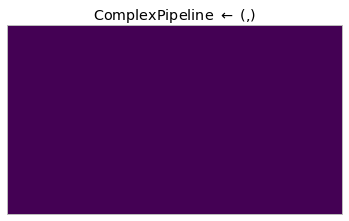

In [4]:
complexPipeline = cf.ComplexPipeline()
complexPipeline(frame)

complexPipeline.showValue()

Saved to /tmp/test.pdf.


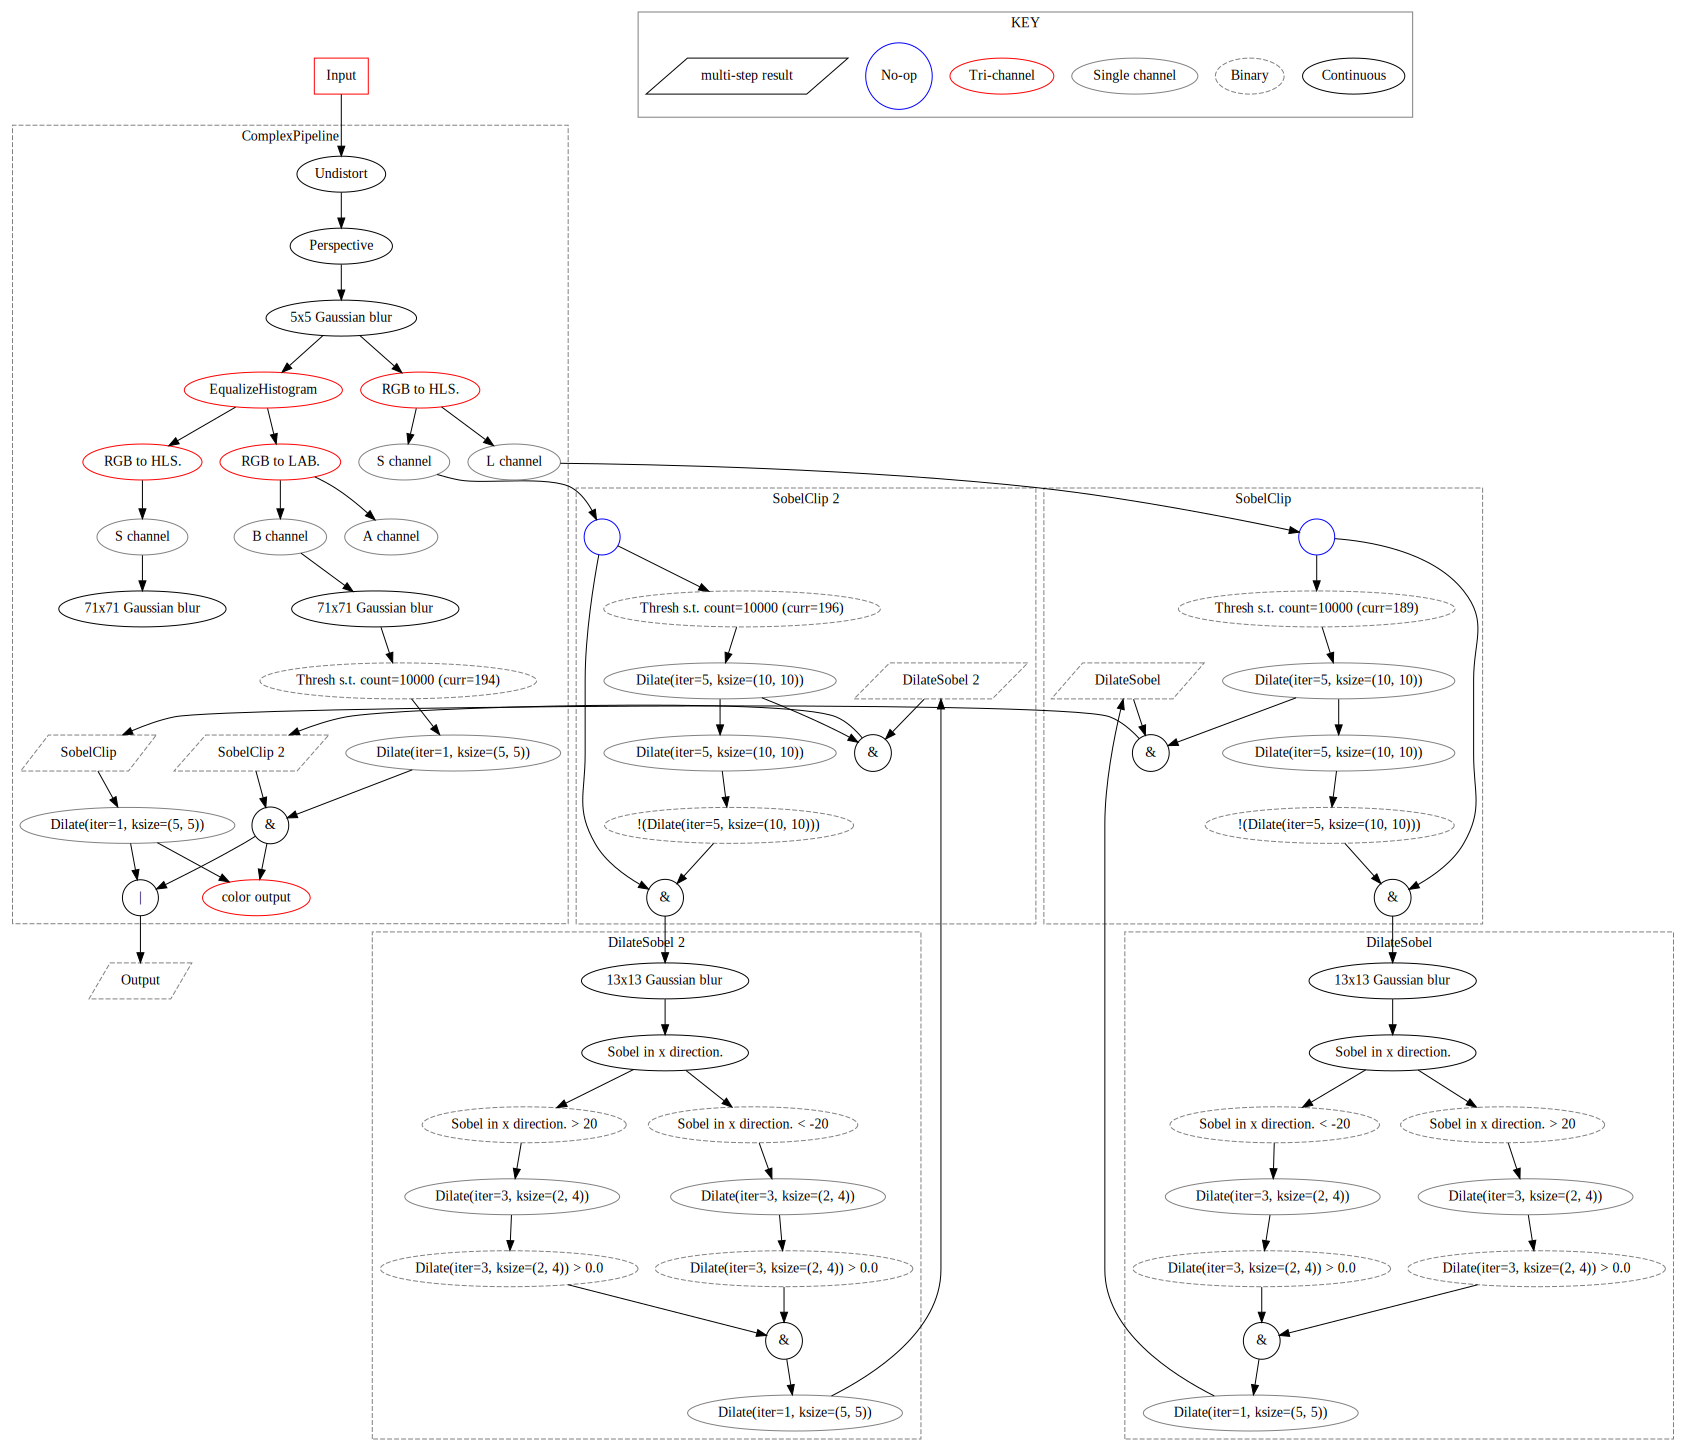

In [5]:
gv = complexPipeline.draw('/tmp/test', format='pdf')
gv

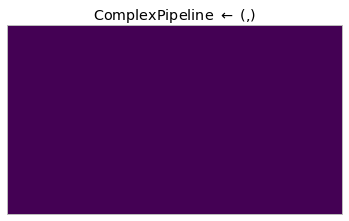

In [6]:
complexPipeline(frames[3])
complexPipeline.showValue()

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

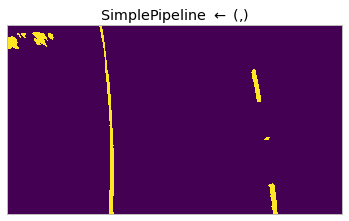

In [7]:
simplePipeline = cf.SimplePipeline()
simplePipeline(frame)

simplePipeline.showValue()

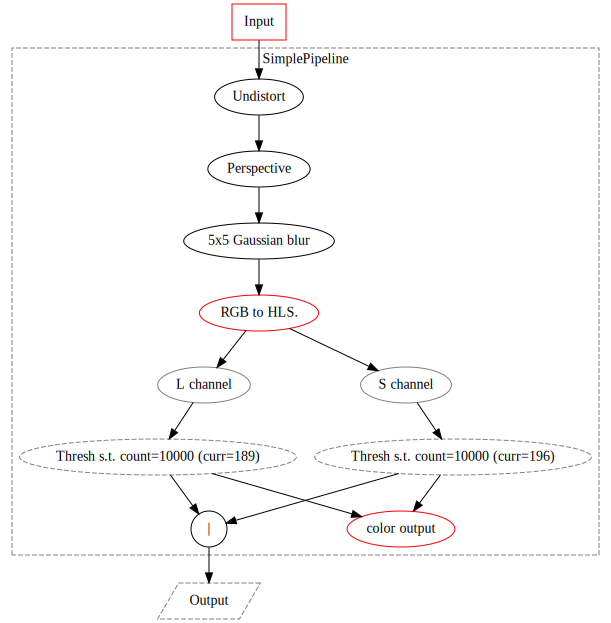

10/|/100%|| 10/10 [00:20<00:00,  6.94it/s]

In [8]:
simplePipeline.draw(addKey=False)